In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

In [2]:
dataset_df = pd.read_csv("Feb_IDMST_correlation.csv")

dataset_df.head()

,Alpha,Beta,Gamma,GTP,Eta,Road_length,Network Density,Edge Graph Density,Nodal Graph Density,NP,LPI,CLUMPY,AI,NLSI
0,0.918602,2.836868,0.945736,1.865741,0.040207,1898.331177,17.513924,435.594397,153.547625,5299,3.7820,0.6808,79.6070,0.2039
1,0.858968,2.717425,0.905983,1.751747,0.046592,1313.717944,11.084396,237.901624,87.546718,5999,0.2348,0.6374,68.4216,0.3158
2,0.936320,2.872315,0.957548,1.901040,0.034193,1714.513607,14.574160,426.230216,148.392583,5722,0.8446,0.6529,72.1841,0.2782
3,0.875269,2.750171,0.916849,1.779538,0.036147,1454.757045,12.764563,353.132911,128.403991,3003,1.8571,0.7332,78.2721,0.2173
4,0.882601,2.764706,0.921738,1.799075,0.038581,1164.130948,10.106350,261.954209,94.749395,4145,0.6299,0.6927,73.5657,0.2643


# Pearson Correlation Matrix

<AxesSubplot: >

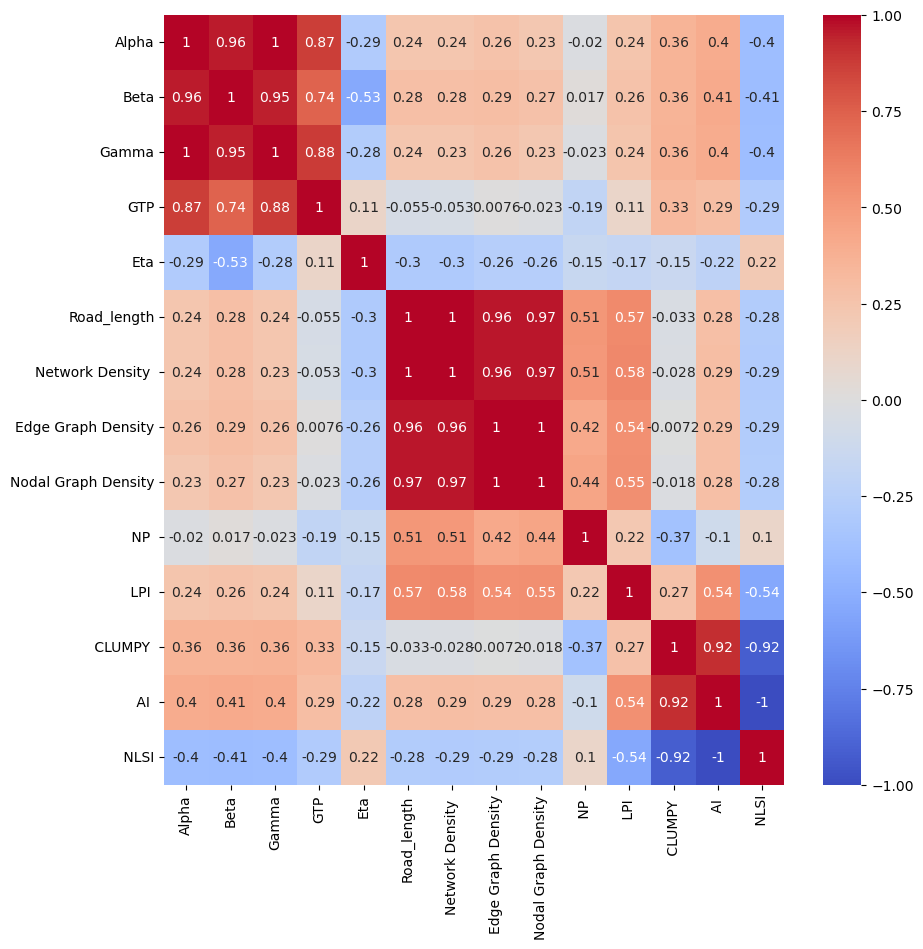

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset_df.corr(method='pearson'), vmin=-1, cmap="coolwarm", annot=True)

# Spearman Matrix

<AxesSubplot: >

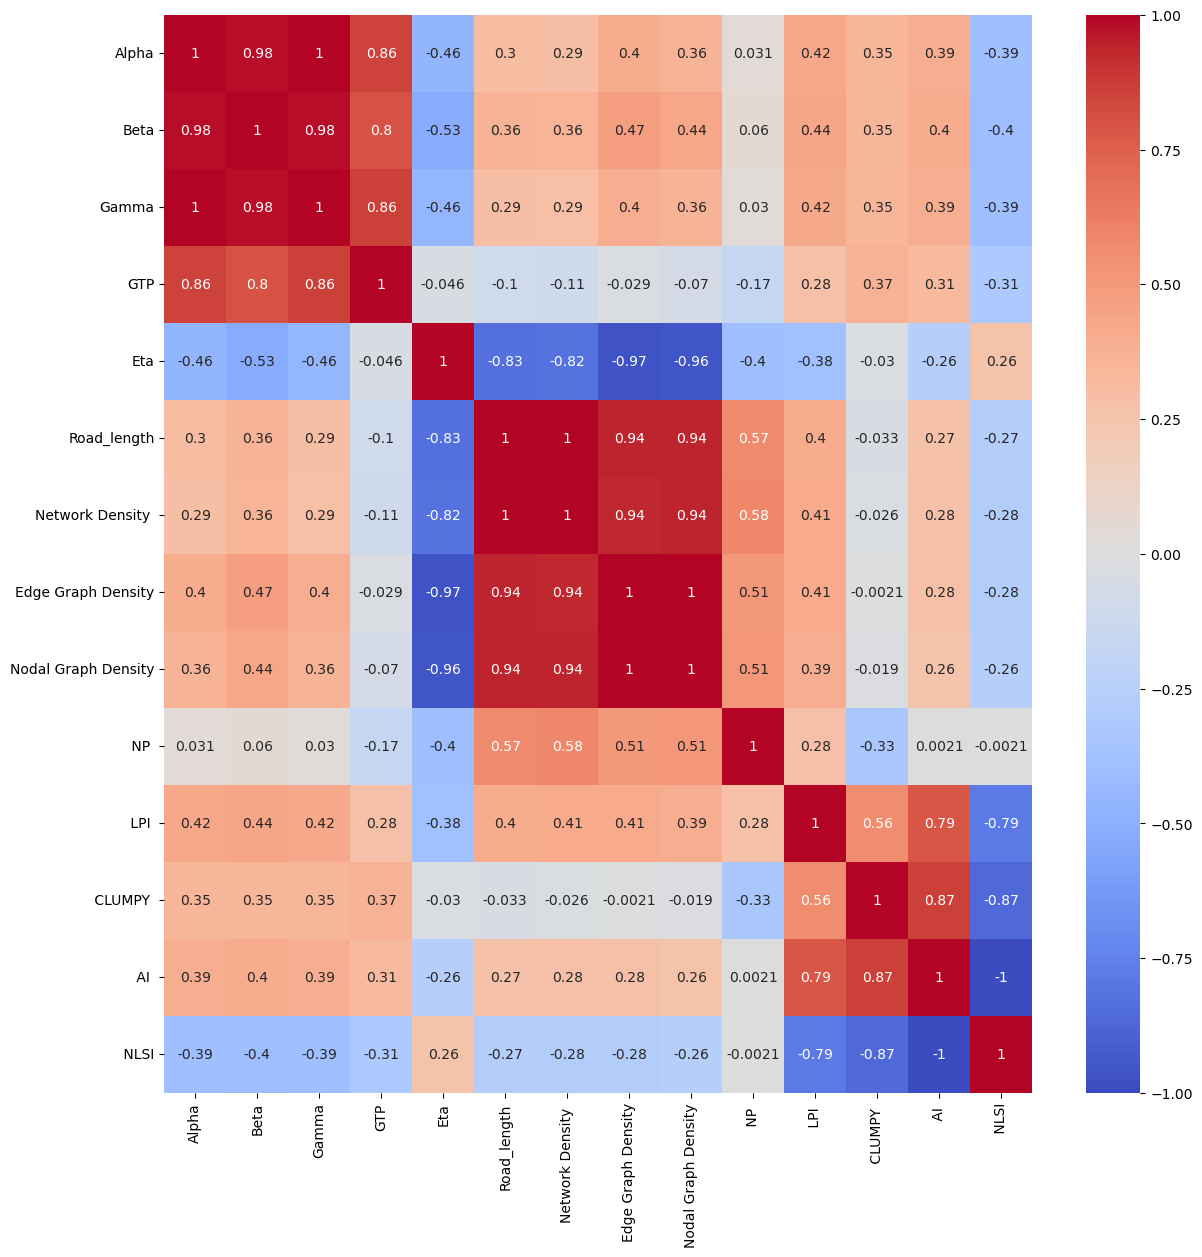

In [5]:
plt.figure(figsize=(14,14))
sns.heatmap(dataset_df.corr(method='spearman'), vmin=-1, cmap="coolwarm", annot=True)

# Kendall Matrix

<AxesSubplot: >

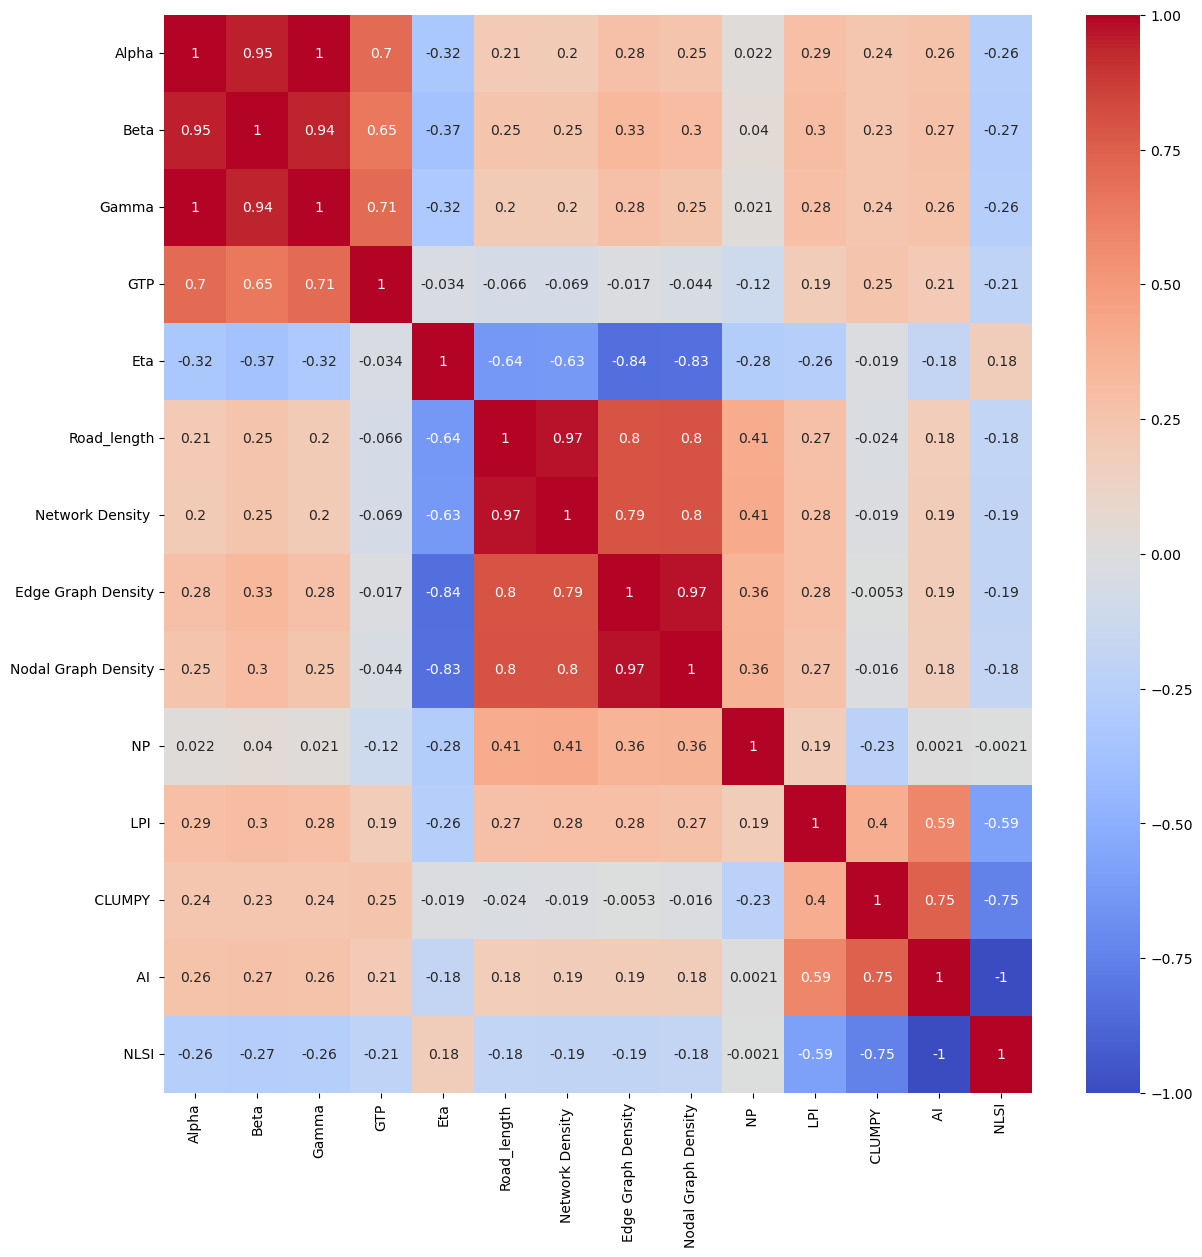

In [6]:
plt.figure(figsize=(14,14))
sns.heatmap(dataset_df.corr(method='kendall'), vmin=-1, cmap="coolwarm", annot=True)

# CCC Matrix

In [7]:
def coef(data):
    matrix = np.zeros((data.shape[1], data.shape[1]))
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            df01 = pd.DataFrame(zip(data.iloc[:,i], data.iloc[:,j]), columns=["x","y"])
            df01["yranks"] = df01["y"].rank()
            df01 = df01.sort_values("x")
            rank_series = df01["yranks"].reset_index(drop=True)
            #rank_series
            diff=[]
            for k in range(len(rank_series)-1):
                diff.append(abs(rank_series[k+1]-rank_series[k]))
            f=1-3*(sum(diff)/(df01.shape[0]**2-1))
            matrix[i,j] = f
    return matrix

a = coef(dataset_df)
    
dataset_df_CCC = pd.DataFrame(a, columns=dataset_df.columns, index=dataset_df.columns).round(3)

<AxesSubplot: >

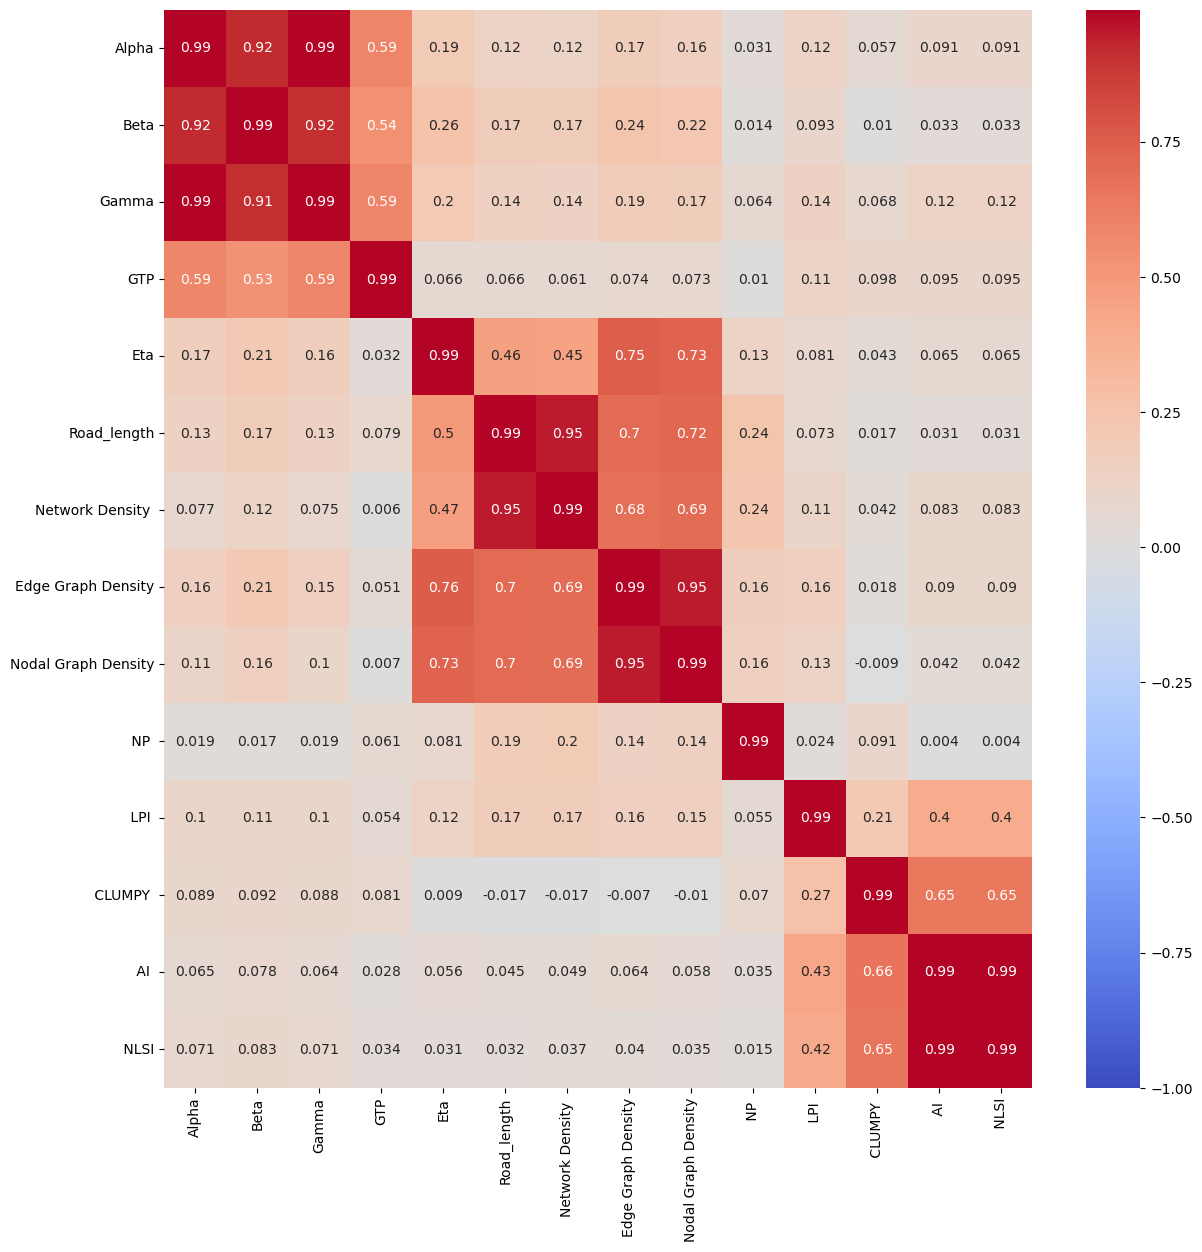

In [8]:
plt.figure(figsize=(14,14))
sns.heatmap(dataset_df_CCC, vmin=-1, cmap="coolwarm", annot=True)